# Datasets

Box Office Mojo:
- bom.movie_gross.csv.gz

IMDB (more infor info [here](https://www.imdb.com/interfaces/)):
- imdb.name.basics.csv.gz
- imdb.title.akas.csv.gz
- imdb.title.basics.csv.gz
- imdb.title.crew.csv.gz
- imdb.title.principals.csv.gz
- imdb.title.ratings.csv.gz

Rotten Tomatoes:
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz

TheMovieDB:
- tmdb.movies.csv.gz

The Numbers:
- tn.movie_budgets.csv.gz

# Genres Data Exploration

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500) # Allows Jupyter Notebook to expand how much data is shown.

## Reading in IMDB's title.basics dataset

In [2]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
g_df = imdb_title_basics_df.copy() #g stands for genre(s)
g_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Identifying Duplicates in IMDB's title.basics

Now I want to see how many duplicates are in the `'primary_title'` column.

I probably want to see duplicates later on so I might as well define a function.

In [3]:
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(g_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                         24
The Return                   20
Broken                       20
Alone                        16
Homecoming                   16
                             ..
KanZeOn                       1
Mahô shôjo wo wasurenai       1
Loveling                      1
Organizatsiya                 1
Al Thalasa Yeshtghilonaha     1
Name: primary_title, Length: 136071, dtype: int64

## Creating `'title_dupes_df'` DataFrame to include new movie titles with movie name and movie year for duplicates

To do this, I need to create a new DataFrame called `title_dupes_df`.

But I first need to create a unique ID column within `g_df` so that I can easily merge `title_dupes_df` later.

In [4]:
g_df.reset_index(inplace=True)
g_df.rename(columns={'index' : 'g_unique_id'}, inplace=True)
g_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


I now need to create a dataframe of all the duplicate movie titles, and then create a new column called `'updated_title'` that includes the name of the movie and the year of the movie.

In [5]:
title_vcs = pd.Series(g_df['primary_title'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = g_df[g_df['primary_title'].isin(title_dupes)].copy()
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [6]:
title_dupes_df['updated_title'] = title_dupes_df['primary_title'] + ' ' + title_dupes_df['start_year'].astype(str)
title_dupes_df

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


I want to see how many unique duplicates there are in `title_dupes_df` and compare it to how many unique duplicates there were in `g_df`.

Over 66% of the records that once weren't unique are now unique!

In [7]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
The Promise 2017                               4
Broken 2012                                    4
                                              ..
The Offering 2011                              1
Coming Out 2015                                1
Asura 2012                                     1
Station to Station 2014                        1
Otello 2017                                    1
Name: updated_title, Length: 14183, dtype: int64

Now lets remove the columns that we don't want to duplicate during the merge.

In [8]:
remove_columns = ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
title_dupes_df.drop(columns=remove_columns, inplace=True)
title_dupes_df

,g_unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


## Merging `'title_dupes_df1'` with `'g_df'`

I now need too merge `title_dupes_df` into `g_df`.

In [9]:
g_and_dupes_df = pd.merge(left=g_df, right=title_dupes_df, on=['g_unique_id'], how ='left')
g_and_dupes_df.head(25)

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


Now I need to assign non-null values in the `'updated_title'` column to their respective `'primary_title`'. I found it easiest to create a new column that tells me whether or not a non-null value is in the `'updated_title'` column.

In [10]:
# THIS CODE BLOCK WILL TAKE ~1 MINUTE TO FINISH RUNNING

g_and_dupes_df['is_title_NaN'] = g_and_dupes_df['updated_title'].isnull()
g_and_dupes_df.head(25)
for movie_index in list(range(len(g_and_dupes_df.index))):
    if ~g_and_dupes_df.loc[movie_index, 'is_title_NaN']:
        g_and_dupes_df.loc[movie_index, 'primary_title'] = g_and_dupes_df.loc[movie_index, 'updated_title']
g_and_dupes_df.head(25)

,g_unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,is_title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


Now lets remove the columns that we don't need for further data exploration.

In [11]:
remove_columns = ['g_unique_id','updated_title', 'is_title_NaN']
g_and_dupes_df.drop(columns=remove_columns, inplace=True)

In [12]:
g_df = g_and_dupes_df.copy()
display(g_df.head(25))
g_df.info()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.8+ MB


# Using Julian's Exploratory Data

Attempting to merge Julian's data with my own...

## Reading in TheNumber's movie_budgets dataset

In [13]:
# Credit to Julian
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
mm_df = tn_movie_budgets_df.copy() #mm stands for money_metrics
display(mm_df)
mm_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Drop `'id'` column as it only adds confusion.

In [14]:
mm_df.drop(columns='id', inplace=True)

## Converting columns with \$'s (`str`) to `int` 

In [15]:
# Credit to Julian
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    
    return df

mm_df = clean_a_money_column(mm_df,'worldwide_gross')
mm_df = clean_a_money_column(mm_df,'domestic_gross')
mm_df = clean_a_money_column(mm_df,'production_budget')
display(mm_df)
mm_df.info() # Notice that the dtype for columns 3 thru 5 are now int64 instead of object

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


## Profit Margin & Return on Investment

Profit Margin (PM): $(Revenue-Cost)/Revenue$

Return on Investment (ROI): $Revenue/Cost$

In [16]:
# Credit to Julian
numerator = mm_df['worldwide_gross'] - mm_df['production_budget']
mm_df['profit_margin'] = (numerator*100)/mm_df['worldwide_gross']
mm_df.loc[mm_df['profit_margin'] == float('-inf'), 'profit_margin'] = 0
mm_df['ROI'] = mm_df['worldwide_gross']/mm_df['production_budget']
# mm_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin
mm_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000


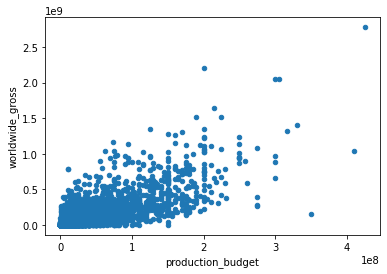

In [17]:
# Credit to Julian
# Scatter plot of worldwide gross revenue vs. production budget cost:
mm_df.plot('production_budget', 'worldwide_gross', kind='scatter');

## Adding `'Year'` column

In [18]:
# Credit to Julian
mm_df['year'] = pd.to_numeric(mm_df['release_date'].map(lambda x: x[-4:]))
mm_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
...,...,...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018
5778,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015


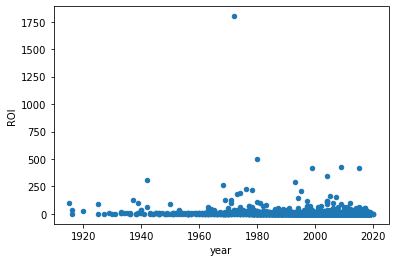

In [19]:
# Credit to Julian
# Scatter plot of ROI vs. Year of Movie Release:
mm_df.plot('year', 'ROI', kind='scatter');

## Dealing with Duplicates in TheNumbers' movie_budgets

My approach towards this is the same as my approach early towards IMDB's title.basics dataset. Reference that section if you need to follow along.

In [20]:
determine_dupes(mm_df['movie'])

Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


Halloween                                   3
King Kong                                   3
Home                                        3
Snitch                                      2
The Texas Chainsaw Massacre                 2
                                           ..
Captain Underpants: The First Epic Movie    1
Viskningar och rop                          1
City of Ember                               1
The Sitter                                  1
The Importance of Being Earnest             1
Name: movie, Length: 5698, dtype: int64

In [21]:
mm_df.reset_index(inplace=True)
mm_df.rename(columns={'index' : 'mm_unique_id'}, inplace=True)
# mm_df

In [22]:
title_vcs = pd.Series(mm_df['movie'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = mm_df[mm_df['movie'].isin(title_dupes)].copy()
# title_dupes_df

In [23]:
title_dupes_df['updated_title'] = title_dupes_df['movie'] + ' ' + title_dupes_df['year'].astype(str)
# title_dupes_df

In [24]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1
Total amount of duplicate movie titles: 2


Home 2009                             2
Total Recall 2012                     1
Ghostbusters 2016                     1
Unknown 2006                          1
Serenity 2005                         1
Side Effects 2005                     1
Notorious 2009                        1
Death at a Funeral 2007               1
The Alamo 1960                        1
Halloween 2018                        1
Cat People 1982                       1
Footloose 2011                        1
Friday the 13th 1980                  1
A Nightmare on Elm Street 1984        1
The Island 2005                       1
Point Break 2015                      1
Poltergeist 1982                      1
Godzilla 2014                         1
Death at a Funeral 2010               1
Carrie 2013                           1
Ghostbusters 1984                     1
The Last House on the Left 2009       1
Point Break 1991                      1
Pinocchio 1940                        1
Ben-Hur 2016                          1


In [25]:
remove_columns = ['release_date', 'movie', 'production_budget', 'domestic_gross',
                  'worldwide_gross', 'profit_margin', 'ROI', 'year']
title_dupes_df.drop(columns=remove_columns, inplace=True)
# title_dupes_df

In [26]:
mm_and_dupes_df = pd.merge(left=mm_df, right=title_dupes_df, on=['mm_unique_id'], how ='left')
# mm_and_dupes_df.head(25)

In [27]:
mm_and_dupes_df['is_title_NaN'] = mm_and_dupes_df['updated_title'].isnull()
mm_and_dupes_df.head(25)
for movie_index in list(range(len(mm_and_dupes_df.index))):
    if ~mm_and_dupes_df.loc[movie_index, 'is_title_NaN']:
        mm_and_dupes_df.loc[movie_index, 'movie'] = mm_and_dupes_df.loc[movie_index, 'updated_title']
# mm_and_dupes_df.head(100)

In [28]:
mm_and_dupes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mm_unique_id       5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int64  
 4   domestic_gross     5782 non-null   int64  
 5   worldwide_gross    5782 non-null   int64  
 6   profit_margin      5782 non-null   float64
 7   ROI                5782 non-null   float64
 8   year               5782 non-null   int64  
 9   updated_title      165 non-null    object 
 10  is_title_NaN       5782 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 662.5+ KB


In [29]:
remove_columns = ['mm_unique_id','updated_title', 'is_title_NaN']
mm_and_dupes_df.drop(columns=remove_columns, inplace=True)

In [30]:
mm_df = mm_and_dupes_df.copy()
display(mm_df.head(25))
mm_df.info()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,85.097242,6.710167,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018
7,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,68.860947,3.211401,2007
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   int64  
 3   domestic_gross     5782 non-null   int64  
 4   worldwide_gross    5782 non-null   int64  
 5   profit_margin      5782 non-null   float64
 6   ROI                5782 non-null   float64
 7   year               5782 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 566.5+ KB


## Merging The Numbers' movie_budgets with IMDB's title.basics

In order to perform a merge later on, I need to rename the movie title column, `'primary_title'`, within IMDB's title.basics.

In [31]:
g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
display(g_df)

,tconst,movie,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


Left join g_df into mm_df:

In [32]:
mm_and_g_df = pd.merge(left=mm_df, right=g_df, on='movie', how ='left')
# display(mm_and_g_df)

In [33]:
display(mm_and_g_df)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"
5790,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999,NaN,NaN,NaN,NaN,NaN
5791,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005,NaN,NaN,NaN,NaN,NaN
5792,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0.000000,0.000000,2015,tt2107644,A Plague So Pleasant,2013.0,76.0,"Drama,Horror,Thriller"


An additional merge is necessary because some of the movie titles in `mm_df` don't have duplicates and didn't need to be renamed with a year. Some of the values that just got merged from `g_df` didn't associate to a record in `mm_df` because it was renamed with a year and couldn't find it's match in `mm_df`. To fix this, I now want to merge an unaltered copy of the original `imdb_title_basics_df` with `mm_and_g_df`. With that being said, I will introduce more duplicates, but it will be manageable.

In [34]:
unaltered_g_df = imdb_title_basics_df.copy()
unaltered_g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)

In [35]:
mm_and_g_copy_df = mm_and_g_df.copy()

In [36]:
mm_and_g_df = pd.merge(left=mm_and_g_copy_df, right=unaltered_g_df, on='movie', how ='left')

In [37]:
display(mm_and_g_df.info())
# display(test_mm_and_g_df.head(50))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6966 entries, 0 to 6965
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       6966 non-null   object 
 1   movie              6966 non-null   object 
 2   production_budget  6966 non-null   int64  
 3   domestic_gross     6966 non-null   int64  
 4   worldwide_gross    6966 non-null   int64  
 5   profit_margin      6966 non-null   float64
 6   ROI                6966 non-null   float64
 7   year               6966 non-null   int64  
 8   tconst_x           1764 non-null   object 
 9   original_title_x   1764 non-null   object 
 10  start_year_x       1764 non-null   float64
 11  runtime_minutes_x  1663 non-null   float64
 12  genres_x           1749 non-null   object 
 13  tconst_y           3423 non-null   object 
 14  original_title_y   3422 non-null   object 
 15  start_year_y       3423 non-null   float64
 16  runtime_minutes_y  2999 

None

In [38]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 533
Total amount of duplicate movie titles: 1718


The Return                           20
Freedom                              14
The Journey                          11
Forget Me Not                        10
Trapped                              10
                                     ..
Freaky Deaky                          1
Inchon                                1
Sidewalks of New York                 1
Flatliners 1990                       1
I Want Someone To Eat Cheese With     1
Name: movie, Length: 5781, dtype: int64

In [39]:
mm_and_g_df['is_tconst_x_NaN'] = mm_and_g_df['tconst_x'].isnull()
mm_and_g_df['is_tconst_y_NaN'] = mm_and_g_df['tconst_y'].isnull()

for movie_index in list(range(len(mm_and_g_df.index))):
    if (mm_and_g_df.loc[movie_index, 'is_tconst_x_NaN']) and (~mm_and_g_df.loc[movie_index, 'is_tconst_y_NaN'])\
        and (mm_and_g_df.loc[movie_index, 'start_year_y'].astype('int64') == mm_and_g_df.loc[movie_index, 'year']):
            mm_and_g_df.loc[movie_index, 'tconst_x'] = mm_and_g_df.loc[movie_index, 'tconst_y']
            mm_and_g_df.loc[movie_index, 'original_title_x'] = mm_and_g_df.loc[movie_index, 'original_title_y']
            mm_and_g_df.loc[movie_index, 'start_year_x'] = mm_and_g_df.loc[movie_index, 'start_year_y']
            mm_and_g_df.loc[movie_index, 'runtime_minutes_x'] = mm_and_g_df.loc[movie_index, 'runtime_minutes_y']
            mm_and_g_df.loc[movie_index, 'genres_x'] = mm_and_g_df.loc[movie_index, 'genres_y']

In [40]:
remove_columns = ['is_tconst_x_NaN', 'is_tconst_y_NaN', 'tconst_y', 'original_title_y', 
                  'start_year_y', 'runtime_minutes_y', 'genres_y']
mm_and_g_df.drop(columns=remove_columns, inplace=True)

In [41]:
mm_and_g_df.rename(columns={'tconst_x': 'tconst', 'original_title_x': 'original_title',
                                 'start_year_x': 'start_year', 'runtime_minutes_x': 'runtime_minutes',
                                 'genres_x': 'genres'}, inplace=True)

In [42]:
display(mm_and_g_df.head(1))
mm_and_g_df.shape

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror


(6966, 13)

In [43]:
mm_and_g_null_values = mm_and_g_df['tconst'].isna().sum()
print(f'Rows with Null Values in tconst Column: {mm_and_g_null_values}')

Rows with Null Values in tconst Column: 4889


In [44]:
mm_and_g_df.dropna(subset=['tconst'], axis=0, inplace=True)

In [45]:
display(mm_and_g_df.head(100))
display(mm_and_g_df.info())

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209,54.264473,2.186484,2017,tt0974015,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923,65.894399,2.932070,2015,tt2379713,Spectre,2015.0,148.0,"Action,Adventure,Thriller"
10,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,74.641268,3.943415,2012,tt1345836,The Dark Knight Rises,2012.0,164.0,"Action,Thriller"
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,30.052383,1.429641,2018,tt3778644,Solo: A Star Wars Story,2018.0,135.0,"Action,Adventure,Fantasy"
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-5.768370,0.945462,2013,tt1210819,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western"


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 6964
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2077 non-null   object 
 1   movie              2077 non-null   object 
 2   production_budget  2077 non-null   int64  
 3   domestic_gross     2077 non-null   int64  
 4   worldwide_gross    2077 non-null   int64  
 5   profit_margin      2077 non-null   float64
 6   ROI                2077 non-null   float64
 7   year               2077 non-null   int64  
 8   tconst             2077 non-null   object 
 9   original_title     2077 non-null   object 
 10  start_year         2077 non-null   float64
 11  runtime_minutes    1960 non-null   float64
 12  genres             2058 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 227.2+ KB


## Data Cleaning...

First off, Avatar is not a Horror film... It is an Action, Adventure, Fantasy. So let's first change that.

In [46]:
mm_and_g_df.loc[mm_and_g_df['movie'] == 'Avatar', 'genres'] = "Action,Adventure,Fantasy"

Now I need to create a unique ID column in the newly merged DataFrame.

In [47]:
mm_and_g_df.reset_index(inplace=True)
mm_and_g_df.rename(columns={'index' : 'unique_id'}, inplace=True)
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"Comedy,Drama,Horror"
2073,6953,"Apr 1, 1996",Bang,10000,527,527,-1797.533207,0.052700,1996,tt6616538,Bang,2015.0,NaN,NaN
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"Comedy,Drama"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"


In [48]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 52
Total amount of duplicate movie titles: 115


The Promise                4
Home 2015                  4
Redemption                 4
The Wall                   3
Brothers 2015              3
                          ..
The Sisterhood of Night    1
Melancholia                1
Turbo                      1
The D Train                1
Unplanned                  1
Name: movie, Length: 2014, dtype: int64

In [49]:
series_vcs = pd.Series(mm_and_g_df['movie'].value_counts())
series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
sorted(series_dupes)

['A Better Life',
 'Abduction',
 'Absentia',
 'Addicted',
 'After',
 'Alice in Wonderland 2010',
 'Believe',
 'Big Eyes',
 'Brotherly Love',
 'Brothers 2015',
 'Burlesque',
 'Cinderella 2015',
 'Coco',
 'Crossroads 2015',
 'Cyrus',
 'Denial',
 'Destiny',
 'Exeter',
 'Heist 2015',
 'Hercules 2014',
 'Highway',
 'Home 2015',
 'Homefront',
 'Hush',
 'Joe',
 'Leap Year',
 'Let There Be Light',
 'Lights Out',
 'Phantom',
 'Redemption',
 'Robin Hood 2018',
 'Sisters',
 'Spotlight',
 'Stronger',
 'The Artist',
 'The Bounty Hunter',
 'The Call',
 'The Circle',
 'The Darkness',
 'The Family',
 'The Forest',
 'The Night Before',
 'The Prince',
 'The Promise',
 'The Square 2013',
 'The Tempest',
 'The Walk',
 'The Wall',
 'Treachery',
 'Truth or Dare',
 'Underdogs',
 'Weekend']

In [50]:
def generate_uid_removal_list(test_df, keep_uid_list):
    test_df = test_df.drop_duplicates(subset=['unique_id'])
    for uid in keep_uid_list:
        test_df = test_df[test_df['unique_id'] != uid]

    return test_df['unique_id'].tolist()

def remove_uid_from_df(df, uid_removal_list):
    for uid in uid_removal_list:
        df = df[df['unique_id'] != uid]
    
    return df

def manual_data_cleaning(df, movie_title, keep_uid_list):
    print("Shape of df before cleaning:", df.shape)
    test_df = df[df['movie'] == movie_title]
    uid_removal_list = generate_uid_removal_list(test_df, keep_uid_list)
    df = remove_uid_from_df(df, uid_removal_list)
    print("Shape of df after cleaning:", df.shape)
    
    return(df)

### Legend for Data Cleaning
KEEP `'unique_id'`: `mm_df['release_date']` <--> `g_df['tconst']`

#### Movie Title: A Better Life

KEEP 4379: Jun 24, 2011 <--> tt1554091

In [51]:
movie_title = 'A Better Life' ######INPUT MANUALLY HERE######
keep_uid_list = [4379] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1332,4379,"Jun 24, 2011",A Better Life,10000000,1759252,1884251,-430.714857,0.188425,2011,tt1554091,A Better Life,2011.0,98.0,"Drama,Romance"
1333,4380,"Jun 24, 2011",A Better Life,10000000,1759252,1884251,-430.714857,0.188425,2011,tt2027265,Une vie meilleure,2011.0,110.0,Drama


Shape of df before cleaning: (2077, 14)
Shape of df after cleaning: (2076, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1332,4379,"Jun 24, 2011",A Better Life,10000000,1759252,1884251,-430.714857,0.188425,2011,tt1554091,A Better Life,2011.0,98.0,"Drama,Romance"


#### Movie Title: Abduction

KEEP 1982: Sep 23, 2011 <--> tt1600195

In [52]:
movie_title = 'Abduction' ######INPUT MANUALLY HERE######
keep_uid_list = [1982] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
661,1982,"Sep 23, 2011",Abduction,35000000,28087155,86648359,59.606852,2.475667,2011,tt1600195,Abduction,2011.0,106.0,"Action,Mystery,Thriller"
662,1984,"Sep 23, 2011",Abduction,35000000,28087155,86648359,59.606852,2.475667,2011,tt2447982,Abduction,2011.0,84.0,"Horror,Thriller"


Shape of df before cleaning: (2076, 14)
Shape of df after cleaning: (2075, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
661,1982,"Sep 23, 2011",Abduction,35000000,28087155,86648359,59.606852,2.475667,2011,tt1600195,Abduction,2011.0,106.0,"Action,Mystery,Thriller"


#### Movie Title: Absentia

KEEP 6881: Dec 31, 2011 <--> tt1610996

In [53]:
movie_title = 'Absentia' ######INPUT MANUALLY HERE######
keep_uid_list = [6881] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2042,6881,"Dec 31, 2011",Absentia,70000,0,8555,-718.23495,0.122214,2011,tt1610996,Absentia,2011.0,87.0,"Drama,Horror,Mystery"
2043,6882,"Dec 31, 2011",Absentia,70000,0,8555,-718.23495,0.122214,2011,tt7501544,Absentia,2011.0,60.0,Sci-Fi


Shape of df before cleaning: (2075, 14)
Shape of df after cleaning: (2074, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2042,6881,"Dec 31, 2011",Absentia,70000,0,8555,-718.23495,0.122214,2011,tt1610996,Absentia,2011.0,87.0,"Drama,Horror,Mystery"


#### Movie Title: Addicted

KEEP 5139: Oct 10, 2014 <--> tt2205401

In [54]:
movie_title = 'Addicted' ######INPUT MANUALLY HERE######
keep_uid_list = [5139] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1531,5139,"Oct 10, 2014",Addicted,5000000,17390770,17499242,71.427334,3.499848,2014,tt2205401,Addicted,2014.0,106.0,"Drama,Thriller"
1532,5140,"Oct 10, 2014",Addicted,5000000,17390770,17499242,71.427334,3.499848,2014,tt3435418,Addicted,2014.0,97.0,"Documentary,Music"


Shape of df before cleaning: (2074, 14)
Shape of df after cleaning: (2073, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1531,5139,"Oct 10, 2014",Addicted,5000000,17390770,17499242,71.427334,3.499848,2014,tt2205401,Addicted,2014.0,106.0,"Drama,Thriller"


#### Movie Title: After

KEEP 6498: Dec 31, 2012 <--> tt1799508

In [55]:
movie_title = 'After' ######INPUT MANUALLY HERE######
keep_uid_list = [6498] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1921,6498,"Dec 31, 2012",After,650000,0,0,0.0,0.0,2012,tt1799508,After,2012.0,90.0,"Drama,Fantasy,Mystery"
1922,6499,"Dec 31, 2012",After,650000,0,0,0.0,0.0,2012,tt2404163,After,2012.0,83.0,Romance


Shape of df before cleaning: (2073, 14)
Shape of df after cleaning: (2072, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1921,6498,"Dec 31, 2012",After,650000,0,0,0.0,0.0,2012,tt1799508,After,2012.0,90.0,"Drama,Fantasy,Mystery"


#### Movie Title: Alice in Wonderland 2010

KEEP 51: Mar 5, 2010 <--> tt1014759

In [56]:
movie_title = 'Alice in Wonderland 2010' ######INPUT MANUALLY HERE######
keep_uid_list = [51] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
33,51,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt1014759,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"
34,52,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt2049386,Alice in Wonderland,2010.0,99.0,"Fantasy,Musical"


Shape of df before cleaning: (2072, 14)
Shape of df after cleaning: (2071, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
33,51,"Mar 5, 2010",Alice in Wonderland 2010,200000000,334191110,1025491110,80.497149,5.127456,2010,tt1014759,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy"


#### Movie Title: Believe

KEEP 5530: Dec 2, 2016 <--> tt4700756

In [57]:
movie_title = 'Believe' ######INPUT MANUALLY HERE######
keep_uid_list = [5530] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1633,5530,"Dec 2, 2016",Believe,3500000,890303,890303,-293.124588,0.254372,2016,tt4700756,Believe,2016.0,119.0,Drama
1634,5532,"Dec 2, 2016",Believe,3500000,890303,890303,-293.124588,0.254372,2016,tt9347476,Believe,2016.0,NaN,NaN


Shape of df before cleaning: (2071, 14)
Shape of df after cleaning: (2070, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1633,5530,"Dec 2, 2016",Believe,3500000,890303,890303,-293.124588,0.254372,2016,tt4700756,Believe,2016.0,119.0,Drama


#### Movie Title: Big Eyes

KEEP 4312: Dec 25, 2014 <--> tt1126590

In [58]:
movie_title = 'Big Eyes' ######INPUT MANUALLY HERE######
keep_uid_list = [4312] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1305,4312,"Dec 25, 2014",Big Eyes,10000000,14482031,27317872,63.393928,2.731787,2014,tt1126590,Big Eyes,2014.0,106.0,"Biography,Crime,Drama"
1306,4313,"Dec 25, 2014",Big Eyes,10000000,14482031,27317872,63.393928,2.731787,2014,tt4317898,Big Eyes,2014.0,NaN,Documentary


Shape of df before cleaning: (2070, 14)
Shape of df after cleaning: (2069, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1305,4312,"Dec 25, 2014",Big Eyes,10000000,14482031,27317872,63.393928,2.731787,2014,tt1126590,Big Eyes,2014.0,106.0,"Biography,Crime,Drama"


#### Movie Title: Brotherly Love

KEEP 6031: Apr 24, 2015 <--> tt3262990

In [59]:
movie_title = 'Brotherly Love' ######INPUT MANUALLY HERE######
keep_uid_list = [6031] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1778,6031,"Apr 24, 2015",Brotherly Love,1900000,478595,478595,-296.995372,0.251892,2015,tt3262990,Brotherly Love,2015.0,89.0,Drama
1779,6032,"Apr 24, 2015",Brotherly Love,1900000,478595,478595,-296.995372,0.251892,2015,tt3787742,Brotherly Love,2015.0,57.0,Horror


Shape of df before cleaning: (2069, 14)
Shape of df after cleaning: (2068, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1778,6031,"Apr 24, 2015",Brotherly Love,1900000,478595,478595,-296.995372,0.251892,2015,tt3262990,Brotherly Love,2015.0,89.0,Drama


#### Movie Title: Brothers 2015

KEEP 3946: Aug 14, 2015 <--> tt3802576

In [60]:
movie_title = 'Brothers 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [3946] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1201,3945,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3650484,Brødre,2015.0,100.0,Documentary
1202,3946,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3802576,Brothers,2015.0,156.0,"Action,Drama,Sport"
1203,3947,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt4952376,Bracia,2015.0,68.0,Documentary


Shape of df before cleaning: (2068, 14)
Shape of df after cleaning: (2066, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1202,3946,"Aug 14, 2015",Brothers 2015,13000000,656688,17856688,27.198146,1.373591,2015,tt3802576,Brothers,2015.0,156.0,"Action,Drama,Sport"


#### Movie Title: Burlesque

KEEP 1167: Nov 24, 2010 <--> tt1126591

In [61]:
movie_title = 'Burlesque' ######INPUT MANUALLY HERE######
keep_uid_list = [1167] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
430,1167,"Nov 24, 2010",Burlesque,55000000,39440655,90552675,39.261872,1.646412,2010,tt1126591,Burlesque,2010.0,119.0,"Drama,Music,Musical"
431,1168,"Nov 24, 2010",Burlesque,55000000,39440655,90552675,39.261872,1.646412,2010,tt1586713,Burlesque,2010.0,NaN,Drama


Shape of df before cleaning: (2066, 14)
Shape of df after cleaning: (2065, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
430,1167,"Nov 24, 2010",Burlesque,55000000,39440655,90552675,39.261872,1.646412,2010,tt1126591,Burlesque,2010.0,119.0,"Drama,Music,Musical"


#### Movie Title: Cinderella 2015

KEEP 451: Mar 13, 2015 <--> tt1661199

In [62]:
movie_title = 'Cinderella 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [451] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
227,451,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt1661199,Cinderella,2015.0,105.0,"Drama,Family,Fantasy"
228,452,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt5089556,Cinderella,2015.0,113.0,Fantasy


Shape of df before cleaning: (2065, 14)
Shape of df after cleaning: (2064, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
227,451,"Mar 13, 2015",Cinderella 2015,95000000,201151353,534551353,82.228087,5.626856,2015,tt1661199,Cinderella,2015.0,105.0,"Drama,Family,Fantasy"


#### Movie Title: Coco

KEEP 113: Nov 22, 2017 <--> tt2380307

In [63]:
movie_title = 'Coco' ######INPUT MANUALLY HERE######
keep_uid_list = [113] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
71,113,"Nov 22, 2017",Coco,175000000,209726015,798008101,78.070398,4.560046,2017,tt2380307,Coco,2017.0,105.0,"Adventure,Animation,Comedy"
72,114,"Nov 22, 2017",Coco,175000000,209726015,798008101,78.070398,4.560046,2017,tt7002100,Coco,2017.0,98.0,Horror


Shape of df before cleaning: (2064, 14)
Shape of df after cleaning: (2063, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
71,113,"Nov 22, 2017",Coco,175000000,209726015,798008101,78.070398,4.560046,2017,tt2380307,Coco,2017.0,105.0,"Adventure,Animation,Comedy"


#### Movie Title: Crossroads 2015

KEEP 6613: Jun 23, 2015 <--> tt1848834

In [64]:
movie_title = 'Crossroads 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [6613] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1959,6613,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt1848834,Crossroads,2015.0,87.0,"Action,Crime,Drama"
1960,6614,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt5459744,Kurosurôdo,2015.0,NaN,NaN


Shape of df before cleaning: (2063, 14)
Shape of df after cleaning: (2062, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1959,6613,"Jun 23, 2015",Crossroads 2015,500000,0,0,0.0,0.0,2015,tt1848834,Crossroads,2015.0,87.0,"Action,Crime,Drama"


#### Movie Title: Cyrus

KEEP 4806: Jun 18, 2010 <--> tt1336617

In [65]:
movie_title = 'Cyrus' ######INPUT MANUALLY HERE######
keep_uid_list = [4806] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1445,4805,"Jun 18, 2010",Cyrus,7000000,7468936,10062896,30.43752,1.437557,2010,tt1327709,Cyrus,2010.0,87.0,"Crime,Horror,Mystery"
1446,4806,"Jun 18, 2010",Cyrus,7000000,7468936,10062896,30.43752,1.437557,2010,tt1336617,Cyrus,2010.0,91.0,"Comedy,Drama,Romance"


Shape of df before cleaning: (2062, 14)
Shape of df after cleaning: (2061, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1446,4806,"Jun 18, 2010",Cyrus,7000000,7468936,10062896,30.43752,1.437557,2010,tt1336617,Cyrus,2010.0,91.0,"Comedy,Drama,Romance"


#### Movie Title: Denial

KEEP 4360: Sep 30, 2016 <--> tt4645330

In [66]:
movie_title = 'Denial' ######INPUT MANUALLY HERE######
keep_uid_list = [4360] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1321,4360,"Sep 30, 2016",Denial,10000000,4073448,9263940,-7.945431,0.926394,2016,tt4645330,Denial,2016.0,109.0,"Biography,Drama"
1322,4361,"Sep 30, 2016",Denial,10000000,4073448,9263940,-7.945431,0.926394,2016,tt5897002,Denial,2016.0,93.0,Documentary


Shape of df before cleaning: (2061, 14)
Shape of df after cleaning: (2060, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1321,4360,"Sep 30, 2016",Denial,10000000,4073448,9263940,-7.945431,0.926394,2016,tt4645330,Denial,2016.0,109.0,"Biography,Drama"


#### Movie Title: Destiny

KEEP 6470: Dec 31, 2014 <--> tt3523348

In [67]:
movie_title = 'Destiny' ######INPUT MANUALLY HERE######
keep_uid_list = [6470] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1915,6469,"Dec 31, 2014",Destiny,750000,0,450,-166566.666667,0.0006,2014,tt3231362,Destiny,2014.0,NaN,"Adventure,Comedy,Family"
1916,6470,"Dec 31, 2014",Destiny,750000,0,450,-166566.666667,0.0006,2014,tt3523348,Destiny,2014.0,105.0,"Drama,Music,Romance"


Shape of df before cleaning: (2060, 14)
Shape of df after cleaning: (2059, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1916,6470,"Dec 31, 2014",Destiny,750000,0,450,-166566.666667,0.0006,2014,tt3523348,Destiny,2014.0,105.0,"Drama,Music,Romance"


#### Movie Title: Exeter

KEEP 6927: Sep 1, 2015 <--> tt1945044

In [68]:
movie_title = 'Exeter' ######INPUT MANUALLY HERE######
keep_uid_list = [6927] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2064,6927,"Sep 1, 2015",Exeter,25000,0,489792,94.895792,19.59168,2015,tt1945044,Exeter,2015.0,91.0,"Horror,Mystery,Thriller"
2065,6929,"Sep 1, 2015",Exeter,25000,0,489792,94.895792,19.59168,2015,tt4931374,Exeter,2015.0,92.0,NaN


Shape of df before cleaning: (2059, 14)
Shape of df after cleaning: (2058, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2064,6927,"Sep 1, 2015",Exeter,25000,0,489792,94.895792,19.59168,2015,tt1945044,Exeter,2015.0,91.0,"Horror,Mystery,Thriller"


#### Movie Title: Heist 2015

KEEP 4561: Nov 13, 2015 <--> tt3276924

In [69]:
movie_title = 'Heist 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [4561] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1387,4561,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt3276924,Heist,2015.0,93.0,"Action,Crime,Thriller"
1388,4562,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt5112932,Heist,2015.0,47.0,Action


Shape of df before cleaning: (2058, 14)
Shape of df after cleaning: (2057, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1387,4561,"Nov 13, 2015",Heist 2015,8900000,50136,3324131,-167.739147,0.373498,2015,tt3276924,Heist,2015.0,93.0,"Action,Crime,Thriller"


#### Movie Title: Hercules 2014

KEEP 418: Jul 25, 2014 <--> tt1267297

In [70]:
movie_title = 'Hercules 2014' ######INPUT MANUALLY HERE######
keep_uid_list = [418] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
211,418,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt1267297,Hercules,2014.0,98.0,"Action,Adventure,Fantasy"
212,419,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt3985956,Hercules,2014.0,112.0,Comedy


Shape of df before cleaning: (2057, 14)
Shape of df after cleaning: (2056, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
211,418,"Jul 25, 2014",Hercules 2014,100000000,72688614,243388614,58.913444,2.433886,2014,tt1267297,Hercules,2014.0,98.0,"Action,Adventure,Fantasy"


#### Movie Title: Highway

KEEP 6005: Dec 31, 2012 <--> tt1693107

In [71]:
movie_title = 'Highway' ######INPUT MANUALLY HERE######
keep_uid_list = [6005] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1764,6005,"Dec 31, 2012",Highway,2000000,0,0,0.0,0.0,2012,tt1693107,Hillbilly Highway,2012.0,77.0,Comedy
1765,6006,"Dec 31, 2012",Highway,2000000,0,0,0.0,0.0,2012,tt2210657,Highway,2012.0,80.0,Drama


Shape of df before cleaning: (2056, 14)
Shape of df after cleaning: (2055, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1764,6005,"Dec 31, 2012",Highway,2000000,0,0,0.0,0.0,2012,tt1693107,Hillbilly Highway,2012.0,77.0,Comedy


#### Movie Title: Home 2015

KEEP 265: Mar 27, 2015 <--> tt2224026

In [72]:
movie_title = 'Home 2015' ######INPUT MANUALLY HERE######
keep_uid_list = [265] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
147,265,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt2224026,Home,2015.0,94.0,"Adventure,Animation,Comedy"
148,266,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5121236,Home,2015.0,15.0,Documentary
149,267,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5775862,Innocent,2015.0,4.0,Drama
150,268,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt5884960,Home,2015.0,58.0,Documentary


Shape of df before cleaning: (2055, 14)
Shape of df after cleaning: (2052, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
147,265,"Mar 27, 2015",Home 2015,130000000,177397510,385997896,66.32106,2.969215,2015,tt2224026,Home,2015.0,94.0,"Adventure,Animation,Comedy"


#### Movie Title: Homefront

KEEP 2877: Nov 27, 2013 <--> tt2312718

In [73]:
movie_title = 'Homefront' ######INPUT MANUALLY HERE######
keep_uid_list = [2877] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
914,2877,"Nov 27, 2013",Homefront,22000000,20158492,51695362,57.442991,2.349789,2013,tt2312718,Homefront,2013.0,100.0,"Action,Thriller"
915,2878,"Nov 27, 2013",Homefront,22000000,20158492,51695362,57.442991,2.349789,2013,tt2558484,The Things We Leave Behind,2013.0,111.0,Drama


Shape of df before cleaning: (2052, 14)
Shape of df after cleaning: (2051, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
914,2877,"Nov 27, 2013",Homefront,22000000,20158492,51695362,57.442991,2.349789,2013,tt2312718,Homefront,2013.0,100.0,"Action,Thriller"


#### Movie Title: Hush

KEEP 6399: Apr 8, 2016 <--> tt5022702	

In [74]:
movie_title = 'Hush' ######INPUT MANUALLY HERE######
keep_uid_list = [6399] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1891,6399,"Apr 8, 2016",Hush,1000000,0,0,0.0,0.0,2016,tt5022702,Hush,2016.0,82.0,"Horror,Thriller"
1892,6400,"Apr 8, 2016",Hush,1000000,0,0,0.0,0.0,2016,tt7255884,Hush,2016.0,80.0,"Documentary,Drama,Reality-TV"


Shape of df before cleaning: (2051, 14)
Shape of df after cleaning: (2050, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1891,6399,"Apr 8, 2016",Hush,1000000,0,0,0.0,0.0,2016,tt5022702,Hush,2016.0,82.0,"Horror,Thriller"


#### Movie Title: Joe

KEEP : Neither record...

In [75]:
movie_title = 'Joe' ######INPUT MANUALLY HERE######
keep_uid_list = [] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1607,5428,"Apr 11, 2014",Joe,4000000,373375,373375,-971.309006,0.093344,2014,tt3532296,Joe,2014.0,NaN,Documentary
1608,5429,"Apr 11, 2014",Joe,4000000,373375,373375,-971.309006,0.093344,2014,tt3614128,Joe,2014.0,5.0,"Biography,Documentary"


Shape of df before cleaning: (2050, 14)
Shape of df after cleaning: (2048, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres


#### Movie Title: Leap Year

KEEP 3230: Jan 8, 2010 <--> tt1216492

In [76]:
movie_title = 'Leap Year' ######INPUT MANUALLY HERE######
keep_uid_list = [3230] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1033,3230,"Jan 8, 2010",Leap Year,19000000,25918920,32618920,41.751597,1.716785,2010,tt1216492,Leap Year,2010.0,100.0,"Comedy,Romance"
1034,3231,"Jan 8, 2010",Leap Year,19000000,25918920,32618920,41.751597,1.716785,2010,tt1537401,Año bisiesto,2010.0,94.0,"Drama,Romance"


Shape of df before cleaning: (2048, 14)
Shape of df after cleaning: (2047, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1033,3230,"Jan 8, 2010",Leap Year,19000000,25918920,32618920,41.751597,1.716785,2010,tt1216492,Leap Year,2010.0,100.0,"Comedy,Romance"


#### Movie Title: Let There Be Light

KEEP 5645: Oct 27, 2017 <--> tt5804314

In [77]:
movie_title = 'Let There Be Light' ######INPUT MANUALLY HERE######
keep_uid_list = [5645] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1660,5645,"Oct 27, 2017",Let There Be Light,3000000,7233471,7241309,58.571026,2.41377,2017,tt5804314,Let There Be Light,2017.0,100.0,Drama
1661,5646,"Oct 27, 2017",Let There Be Light,3000000,7233471,7241309,58.571026,2.41377,2017,tt6184774,Let There Be Light,2017.0,80.0,Documentary


Shape of df before cleaning: (2047, 14)
Shape of df after cleaning: (2046, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1660,5645,"Oct 27, 2017",Let There Be Light,3000000,7233471,7241309,58.571026,2.41377,2017,tt5804314,Let There Be Light,2017.0,100.0,Drama


#### Movie Title: Lights Out

KEEP 5080: Jul 22, 2016 <--> tt4786282

In [78]:
movie_title = 'Lights Out' ######INPUT MANUALLY HERE######
keep_uid_list = [5080] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1509,5080,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,96.639932,29.761302,2016,tt4786282,Lights Out,2016.0,81.0,"Drama,Horror,Mystery"
1510,5081,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,96.639932,29.761302,2016,tt5328340,Lights Out,2016.0,90.0,Documentary


Shape of df before cleaning: (2046, 14)
Shape of df after cleaning: (2045, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1509,5080,"Jul 22, 2016",Lights Out,5000000,67268835,148806510,96.639932,29.761302,2016,tt4786282,Lights Out,2016.0,81.0,"Drama,Horror,Mystery"


#### Movie Title: Phantom

KEEP 3357: Mar 1, 2013 <--> tt1922685

In [79]:
movie_title = 'Phantom' ######INPUT MANUALLY HERE######
keep_uid_list = [3357] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1065,3357,"Mar 1, 2013",Phantom,18000000,1034589,1199510,-1400.61275,0.066639,2013,tt1922685,Phantom,2013.0,98.0,"Drama,History,Thriller"
1066,3358,"Mar 1, 2013",Phantom,18000000,1034589,1199510,-1400.61275,0.066639,2013,tt3088580,Phantom,2013.0,76.0,Drama


Shape of df before cleaning: (2045, 14)
Shape of df after cleaning: (2044, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1065,3357,"Mar 1, 2013",Phantom,18000000,1034589,1199510,-1400.61275,0.066639,2013,tt1922685,Phantom,2013.0,98.0,"Drama,History,Thriller"


#### Movie Title: Redemption

KEEP 2832: Jun 28, 2013 <--> tt1893256

In [80]:
movie_title = 'Redemption' ######INPUT MANUALLY HERE######
keep_uid_list = [2832] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
901,2832,"Jun 28, 2013",Redemption,23000000,36686,13593473,-69.19885,0.591021,2013,tt1893256,Hummingbird,2013.0,100.0,"Action,Crime,Drama"
902,2834,"Jun 28, 2013",Redemption,23000000,36686,13593473,-69.19885,0.591021,2013,tt3059814,Redemption,2013.0,115.0,"Drama,Music,Thriller"
903,2835,"Jun 28, 2013",Redemption,23000000,36686,13593473,-69.19885,0.591021,2013,tt3104228,Sha jie,2013.0,110.0,"Family,Horror,Romance"
904,2836,"Jun 28, 2013",Redemption,23000000,36686,13593473,-69.19885,0.591021,2013,tt3279418,Redemption,2013.0,106.0,"Drama,Mystery,Thriller"


Shape of df before cleaning: (2044, 14)
Shape of df after cleaning: (2041, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
901,2832,"Jun 28, 2013",Redemption,23000000,36686,13593473,-69.19885,0.591021,2013,tt1893256,Hummingbird,2013.0,100.0,"Action,Crime,Drama"


#### Movie Title: Robin Hood 2018

KEEP 446: Nov 21, 2018 <--> tt4532826

In [81]:
movie_title = 'Robin Hood 2018' ######INPUT MANUALLY HERE######
keep_uid_list = [446] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
224,446,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt4532826,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"
225,447,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt6858500,Robin Hood,2018.0,NaN,NaN


Shape of df before cleaning: (2041, 14)
Shape of df after cleaning: (2040, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
224,446,"Nov 21, 2018",Robin Hood 2018,99000000,30824628,84747441,-16.817687,0.856035,2018,tt4532826,Robin Hood,2018.0,116.0,"Action,Adventure,Thriller"


#### Movie Title: Sisters

KEEP 2186: Dec 18, 2015 <--> tt1850457

In [82]:
movie_title = 'Sisters' ######INPUT MANUALLY HERE######
keep_uid_list = [2186] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
723,2186,"Dec 18, 2015",Sisters,30000000,87044645,106030660,71.706297,3.534355,2015,tt1850457,Sisters,2015.0,118.0,Comedy
724,2188,"Dec 18, 2015",Sisters,30000000,87044645,106030660,71.706297,3.534355,2015,tt4793074,Sisters,2015.0,53.0,"Biography,Documentary,Music"


Shape of df before cleaning: (2040, 14)
Shape of df after cleaning: (2039, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
723,2186,"Dec 18, 2015",Sisters,30000000,87044645,106030660,71.706297,3.534355,2015,tt1850457,Sisters,2015.0,118.0,Comedy


#### Movie Title: Spotlight

KEEP 2997: Nov 6, 2015 <--> tt1895587

In [83]:
movie_title = 'Spotlight' ######INPUT MANUALLY HERE######
keep_uid_list = [2997] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
955,2997,"Nov 6, 2015",Spotlight,20000000,45055776,92088460,78.281752,4.604423,2015,tt1895587,Spotlight,2015.0,129.0,"Crime,Drama"
956,2998,"Nov 6, 2015",Spotlight,20000000,45055776,92088460,78.281752,4.604423,2015,tt7785302,Spotlight,2015.0,99.0,Drama


Shape of df before cleaning: (2039, 14)
Shape of df after cleaning: (2038, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
955,2997,"Nov 6, 2015",Spotlight,20000000,45055776,92088460,78.281752,4.604423,2015,tt1895587,Spotlight,2015.0,129.0,"Crime,Drama"


#### Movie Title: Stronger

KEEP 2351: Sep 22, 2017 <--> tt3881784

In [84]:
movie_title = 'Stronger' ######INPUT MANUALLY HERE######
keep_uid_list = [2351] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
774,2351,"Sep 22, 2017",Stronger,30000000,4211129,8786752,-241.423088,0.292892,2017,tt3881784,Stronger,2017.0,119.0,"Biography,Drama"
775,2352,"Sep 22, 2017",Stronger,30000000,4211129,8786752,-241.423088,0.292892,2017,tt5738152,Stronger,2017.0,125.0,Drama


Shape of df before cleaning: (2038, 14)
Shape of df after cleaning: (2037, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
774,2351,"Sep 22, 2017",Stronger,30000000,4211129,8786752,-241.423088,0.292892,2017,tt3881784,Stronger,2017.0,119.0,"Biography,Drama"


#### Movie Title: The Artist

KEEP 3470: Nov 25, 2011 <--> tt1655442

In [85]:
movie_title = 'The Artist' ######INPUT MANUALLY HERE######
keep_uid_list = [3470] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1097,3470,"Nov 25, 2011",The Artist,16000000,44667095,128256712,87.525019,8.016044,2011,tt1655442,The Artist,2011.0,100.0,"Comedy,Drama,Romance"
1098,3471,"Nov 25, 2011",The Artist,16000000,44667095,128256712,87.525019,8.016044,2011,tt1825978,The Artist,2011.0,100.0,Thriller


Shape of df before cleaning: (2037, 14)
Shape of df after cleaning: (2036, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1097,3470,"Nov 25, 2011",The Artist,16000000,44667095,128256712,87.525019,8.016044,2011,tt1655442,The Artist,2011.0,100.0,"Comedy,Drama,Romance"


#### Movie Title: The Bounty Hunter

KEEP 1488: Mar 19, 2010 <--> tt1038919

In [86]:
movie_title = 'The Bounty Hunter' ######INPUT MANUALLY HERE######
keep_uid_list = [1488] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
511,1488,"Mar 19, 2010",The Bounty Hunter,45000000,67061228,135808837,66.86519,3.017974,2010,tt1038919,The Bounty Hunter,2010.0,110.0,"Action,Comedy,Romance"
512,1489,"Mar 19, 2010",The Bounty Hunter,45000000,67061228,135808837,66.86519,3.017974,2010,tt1472211,The Bounty Hunter,2010.0,NaN,NaN


Shape of df before cleaning: (2036, 14)
Shape of df after cleaning: (2035, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
511,1488,"Mar 19, 2010",The Bounty Hunter,45000000,67061228,135808837,66.86519,3.017974,2010,tt1038919,The Bounty Hunter,2010.0,110.0,"Action,Comedy,Romance"


#### Movie Title: The Call

KEEP 3953: Mar 15, 2013 <--> tt1911644

In [87]:
movie_title = 'The Call' ######INPUT MANUALLY HERE######
keep_uid_list = [3953] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1208,3953,"Mar 15, 2013",The Call,12800000,51872378,69821476,81.667532,5.454803,2013,tt1911644,The Call,2013.0,94.0,"Crime,Drama,Horror"
1209,3955,"Mar 15, 2013",The Call,12800000,51872378,69821476,81.667532,5.454803,2013,tt2926868,Lokroep,2013.0,25.0,Documentary


Shape of df before cleaning: (2035, 14)
Shape of df after cleaning: (2034, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1208,3953,"Mar 15, 2013",The Call,12800000,51872378,69821476,81.667532,5.454803,2013,tt1911644,The Call,2013.0,94.0,"Crime,Drama,Horror"


#### Movie Title: The Circle

KEEP 3310: Apr 28, 2017 <--> tt4287320

In [88]:
movie_title = 'The Circle' ######INPUT MANUALLY HERE######
keep_uid_list = [3310] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1051,3308,"Apr 28, 2017",The Circle,18000000,20497844,40651864,55.721588,2.258437,2017,tt2943946,The Circle,2017.0,93.0,"Drama,Horror,Thriller"
1052,3310,"Apr 28, 2017",The Circle,18000000,20497844,40651864,55.721588,2.258437,2017,tt4287320,The Circle,2017.0,110.0,"Drama,Sci-Fi,Thriller"
1053,3311,"Apr 28, 2017",The Circle,18000000,20497844,40651864,55.721588,2.258437,2017,tt6954894,The Circle,2017.0,65.0,Documentary


Shape of df before cleaning: (2034, 14)
Shape of df after cleaning: (2032, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1052,3310,"Apr 28, 2017",The Circle,18000000,20497844,40651864,55.721588,2.258437,2017,tt4287320,The Circle,2017.0,110.0,"Drama,Sci-Fi,Thriller"


#### Movie Title: The Darkness

KEEP 5389: May 13, 2016 <--> tt1878841

In [89]:
movie_title = 'The Darkness' ######INPUT MANUALLY HERE######
keep_uid_list = [5389] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1598,5389,"May 13, 2016",The Darkness,4000000,10753574,10898293,63.297004,2.724573,2016,tt1878841,The Darkness,2016.0,92.0,"Horror,Thriller"
1599,5390,"May 13, 2016",The Darkness,4000000,10753574,10898293,63.297004,2.724573,2016,tt4935746,Las tinieblas,2016.0,92.0,Thriller


Shape of df before cleaning: (2032, 14)
Shape of df after cleaning: (2031, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1598,5389,"May 13, 2016",The Darkness,4000000,10753574,10898293,63.297004,2.724573,2016,tt1878841,The Darkness,2016.0,92.0,"Horror,Thriller"


#### Movie Title: The Family

KEEP 2264: Sep 13, 2013 <--> tt2404311

In [90]:
movie_title = 'The Family' ######INPUT MANUALLY HERE######
keep_uid_list = [2264] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
747,2264,"Sep 13, 2013",The Family,30000000,36918811,51078541,41.266921,1.702618,2013,tt2404311,The Family,2013.0,111.0,"Comedy,Crime,Thriller"
748,2265,"Sep 13, 2013",The Family,30000000,36918811,51078541,41.266921,1.702618,2013,tt4155318,The Family,2013.0,152.0,"Comedy,Crime,Drama"


Shape of df before cleaning: (2031, 14)
Shape of df after cleaning: (2030, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
747,2264,"Sep 13, 2013",The Family,30000000,36918811,51078541,41.266921,1.702618,2013,tt2404311,The Family,2013.0,111.0,"Comedy,Crime,Thriller"


#### Movie Title: The Forest

KEEP 4275: Jan 8, 2016 <--> tt3387542

In [91]:
movie_title = 'The Forest' ######INPUT MANUALLY HERE######
keep_uid_list = [4275] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1296,4275,"Jan 8, 2016",The Forest,10000000,26594261,40749230,75.459659,4.074923,2016,tt3387542,The Forest,2016.0,93.0,"Horror,Mystery,Thriller"
1297,4277,"Jan 8, 2016",The Forest,10000000,26594261,40749230,75.459659,4.074923,2016,tt4982356,The Forest,2016.0,109.0,"Drama,Fantasy,Horror"


Shape of df before cleaning: (2030, 14)
Shape of df after cleaning: (2029, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1296,4275,"Jan 8, 2016",The Forest,10000000,26594261,40749230,75.459659,4.074923,2016,tt3387542,The Forest,2016.0,93.0,"Horror,Mystery,Thriller"


#### Movie Title: The Night Before

KEEP 2605: Nov 20, 2015 <--> tt3530002

In [92]:
movie_title = 'The Night Before' ######INPUT MANUALLY HERE######
keep_uid_list = [2605] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
839,2605,"Nov 20, 2015",The Night Before,25000000,43035725,52427346,52.314962,2.097094,2015,tt3530002,The Night Before,2015.0,101.0,"Adventure,Comedy,Fantasy"
840,2607,"Nov 20, 2015",The Night Before,25000000,43035725,52427346,52.314962,2.097094,2015,tt6353886,The Night Before,2015.0,86.0,Documentary


Shape of df before cleaning: (2029, 14)
Shape of df after cleaning: (2028, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
839,2605,"Nov 20, 2015",The Night Before,25000000,43035725,52427346,52.314962,2.097094,2015,tt3530002,The Night Before,2015.0,101.0,"Adventure,Comedy,Fantasy"


#### Movie Title: The Prince

KEEP 3372: Aug 22, 2014 <--> tt1085492

In [93]:
movie_title = 'The Prince' ######INPUT MANUALLY HERE######
keep_uid_list = [3372] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1070,3372,"Aug 22, 2014",The Prince,18000000,0,0,0.0,0.0,2014,tt1085492,The Prince,2014.0,93.0,"Action,Thriller"
1071,3373,"Aug 22, 2014",The Prince,18000000,0,0,0.0,0.0,2014,tt3918106,Ksiaze,2014.0,71.0,NaN
1072,3374,"Aug 22, 2014",The Prince,18000000,0,0,0.0,0.0,2014,tt4161288,Shah-zadeh,2014.0,92.0,Drama


Shape of df before cleaning: (2028, 14)
Shape of df after cleaning: (2026, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1070,3372,"Aug 22, 2014",The Prince,18000000,0,0,0.0,0.0,2014,tt1085492,The Prince,2014.0,93.0,"Action,Thriller"


#### Movie Title: The Promise

KEEP : None of the 4 records... 

In [94]:
movie_title = 'The Promise' ######INPUT MANUALLY HERE######
keep_uid_list = [] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
256,530,"Apr 21, 2017",The Promise,90000000,8224288,10551417,-752.966004,0.117238,2017,tt10013288,The Promise,2017.0,NaN,Drama
257,531,"Apr 21, 2017",The Promise,90000000,8224288,10551417,-752.966004,0.117238,2017,tt4192918,The Promise,2017.0,NaN,Comedy
258,538,"Apr 21, 2017",The Promise,90000000,8224288,10551417,-752.966004,0.117238,2017,tt7232438,Puen Tee Raluek,2017.0,114.0,"Drama,Horror,Thriller"
259,539,"Apr 21, 2017",The Promise,90000000,8224288,10551417,-752.966004,0.117238,2017,tt9889072,The Promise,2017.0,NaN,Drama


Shape of df before cleaning: (2026, 14)
Shape of df after cleaning: (2022, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres


#### Movie Title: The Square 2013

KEEP 6136: Oct 25, 2013 <--> tt2486682

In [95]:
movie_title = 'The Square 2013' ######INPUT MANUALLY HERE######
keep_uid_list = [6136] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1812,6136,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt2486682,Al midan,2013.0,108.0,"Documentary,Drama,History"
1813,6137,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt3753108,A tér,2013.0,52.0,Documentary


Shape of df before cleaning: (2022, 14)
Shape of df after cleaning: (2021, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1812,6136,"Oct 25, 2013",The Square 2013,1500000,124244,176262,-751.005889,0.117508,2013,tt2486682,Al midan,2013.0,108.0,"Documentary,Drama,History"


#### Movie Title: The Tempest

KEEP 3185: Dec 10, 2010 <--> tt1274300

In [96]:
movie_title = 'The Tempest' ######INPUT MANUALLY HERE######
keep_uid_list = [3185] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1014,3185,"Dec 10, 2010",The Tempest,20000000,277943,277943,-7095.719986,0.013897,2010,tt1274300,The Tempest,2010.0,110.0,"Comedy,Drama,Fantasy"
1015,3186,"Dec 10, 2010",The Tempest,20000000,277943,277943,-7095.719986,0.013897,2010,tt1683003,The Tempest,2010.0,131.0,Drama


Shape of df before cleaning: (2021, 14)
Shape of df after cleaning: (2020, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1014,3185,"Dec 10, 2010",The Tempest,20000000,277943,277943,-7095.719986,0.013897,2010,tt1274300,The Tempest,2010.0,110.0,"Comedy,Drama,Fantasy"


#### Movie Title: The Walk

KEEP 2040: Sep 30, 2015 <--> tt3488710

In [97]:
movie_title = 'The Walk' ######INPUT MANUALLY HERE######
keep_uid_list = [2040] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
674,2039,"Sep 30, 2015",The Walk,35000000,10161183,61492104,43.082123,1.756917,2015,tt2159988,The Walk,2015.0,89.0,"Crime,Thriller"
675,2040,"Sep 30, 2015",The Walk,35000000,10161183,61492104,43.082123,1.756917,2015,tt3488710,The Walk,2015.0,123.0,"Adventure,Biography,Drama"


Shape of df before cleaning: (2020, 14)
Shape of df after cleaning: (2019, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
675,2040,"Sep 30, 2015",The Walk,35000000,10161183,61492104,43.082123,1.756917,2015,tt3488710,The Walk,2015.0,123.0,"Adventure,Biography,Drama"


#### Movie Title: The Wall

KEEP 5684: May 12, 2017 <--> tt4218696

In [98]:
movie_title = 'The Wall' ######INPUT MANUALLY HERE######
keep_uid_list = [5684] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1669,5684,"May 12, 2017",The Wall,3000000,1803064,4495262,33.263067,1.498421,2017,tt4218696,The Wall,2017.0,88.0,"Action,Drama,Thriller"
1670,5689,"May 12, 2017",The Wall,3000000,1803064,4495262,33.263067,1.498421,2017,tt6845582,The Wall,2017.0,5.0,Documentary
1671,5690,"May 12, 2017",The Wall,3000000,1803064,4495262,33.263067,1.498421,2017,tt7578246,The Wall,2017.0,NaN,Documentary


Shape of df before cleaning: (2019, 14)
Shape of df after cleaning: (2017, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1669,5684,"May 12, 2017",The Wall,3000000,1803064,4495262,33.263067,1.498421,2017,tt4218696,The Wall,2017.0,88.0,"Action,Drama,Thriller"


#### Movie Title: Treachery

KEEP 6506: Dec 31, 2013 <--> tt2380301

In [99]:
movie_title = 'Treachery' ######INPUT MANUALLY HERE######
keep_uid_list = [6506] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1924,6506,"Dec 31, 2013",Treachery,625000,0,0,0.0,0.0,2013,tt2380301,Treachery,2013.0,67.0,"Drama,Thriller"
1925,6507,"Dec 31, 2013",Treachery,625000,0,0,0.0,0.0,2013,tt3763580,Treachery,2013.0,73.0,Drama


Shape of df before cleaning: (2017, 14)
Shape of df after cleaning: (2016, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1924,6506,"Dec 31, 2013",Treachery,625000,0,0,0.0,0.0,2013,tt2380301,Treachery,2013.0,67.0,"Drama,Thriller"


#### Movie Title: Truth or Dare

KEEP 5503: Apr 13, 2018 <--> tt6772950

In [100]:
movie_title = 'Truth or Dare' ######INPUT MANUALLY HERE######
keep_uid_list = [5503] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1624,5503,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,96.320721,27.179241,2018,tt6772950,Truth or Dare,2018.0,100.0,"Horror,Thriller"
1625,5504,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,96.320721,27.179241,2018,tt6869948,Truth or Dare,2018.0,92.0,"Comedy,Drama,Romance"


Shape of df before cleaning: (2016, 14)
Shape of df after cleaning: (2015, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1624,5503,"Apr 13, 2018",Truth or Dare,3500000,41411015,95127344,96.320721,27.179241,2018,tt6772950,Truth or Dare,2018.0,100.0,"Horror,Thriller"


#### Movie Title: Underdogs

KEEP 5819: Aug 16, 2013 <--> tt2123342

In [101]:
movie_title = 'Underdogs' ######INPUT MANUALLY HERE######
keep_uid_list = [5819] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1708,5818,"Aug 16, 2013",Underdogs,2500000,35017,1392649,-79.514005,0.55706,2013,tt1634003,Metegol,2013.0,106.0,"Adventure,Animation,Family"
1709,5819,"Aug 16, 2013",Underdogs,2500000,35017,1392649,-79.514005,0.55706,2013,tt2123342,Underdogs,2013.0,102.0,"Drama,Family,Sport"


Shape of df before cleaning: (2015, 14)
Shape of df after cleaning: (2014, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
1709,5819,"Aug 16, 2013",Underdogs,2500000,35017,1392649,-79.514005,0.55706,2013,tt2123342,Underdogs,2013.0,102.0,"Drama,Family,Sport"


#### Movie Title: Weekend

KEEP 6807: Sep 23, 2011 <--> tt1714210

In [102]:
movie_title = 'Weekend' ######INPUT MANUALLY HERE######
keep_uid_list = [6807] ######INPUT MANUALLY HERE######
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])
mm_and_g_df = manual_data_cleaning(mm_and_g_df, movie_title, keep_uid_list)
display(mm_and_g_df[mm_and_g_df['movie'] == movie_title])

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2013,6807,"Sep 23, 2011",Weekend,190000,484592,1577585,87.956275,8.303079,2011,tt1714210,Weekend,2011.0,97.0,"Drama,Romance"
2014,6808,"Sep 23, 2011",Weekend,190000,484592,1577585,87.956275,8.303079,2011,tt1791679,Weekend,2011.0,121.0,"Action,Comedy,Crime"
2015,6809,"Sep 23, 2011",Weekend,190000,484592,1577585,87.956275,8.303079,2011,tt1910670,Weekend,2011.0,80.0,"Comedy,Drama"


Shape of df before cleaning: (2014, 14)
Shape of df after cleaning: (2012, 14)


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
2013,6807,"Sep 23, 2011",Weekend,190000,484592,1577585,87.956275,8.303079,2011,tt1714210,Weekend,2011.0,97.0,"Drama,Romance"


## ANY MORE DUPES?!?

Nope...

In [103]:
determine_dupes(mm_and_g_df['movie'])

Amount of unique duplicate movie title: 0
Total amount of duplicate movie titles: 0


Attack the Block                1
Fuel                            1
Truth or Die                    1
Rust                            1
Ferdinand                       1
                               ..
I Don't Know How She Does It    1
The Strangers: Prey at Night    1
Big Fish                        1
Dallas Buyers Club              1
Unplanned                       1
Name: movie, Length: 2012, dtype: int64

In [104]:
mm_and_g_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2076
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unique_id          2012 non-null   int64  
 1   release_date       2012 non-null   object 
 2   movie              2012 non-null   object 
 3   production_budget  2012 non-null   int64  
 4   domestic_gross     2012 non-null   int64  
 5   worldwide_gross    2012 non-null   int64  
 6   profit_margin      2012 non-null   float64
 7   ROI                2012 non-null   float64
 8   year               2012 non-null   int64  
 9   tconst             2012 non-null   object 
 10  original_title     2012 non-null   object 
 11  start_year         2012 non-null   float64
 12  runtime_minutes    1907 non-null   float64
 13  genres             1999 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 235.8+ KB


## What to do with NaN Values in `'genres'` column??

How many rows in the `'genres'` column have `NaN` values?

In [105]:
mm_and_g_null_values = mm_and_g_df['genres'].isna().sum()
print(f'Rows with Null Values in genres Column: {mm_and_g_null_values}')
NaN_in_mm_and_g = mm_and_g_df[mm_and_g_df['genres'].isnull()]
NaN_in_mm_and_g
# NaN_in_genres.to_csv(r'C:\Users\avbro\Documents\Flatiron\1-phase1\projects\New-Film-Studio-at-Microsoft\null_genres.csv')

Rows with Null Values in genres Column: 13


,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
433,1178,"Jun 4, 1999",Instinct,55000000,34105207,34105207,-61.265698,0.620095,1999,tt4551096,Instinct,2016.0,NaN,NaN
492,1409,"Oct 18, 2002",The Ring,48000000,129094024,248218486,80.662198,5.171218,2002,tt10453170,The Ring,2017.0,NaN,NaN
1019,3197,"Mar 31, 2004",The Touch,20000000,0,5918742,-237.909644,0.295937,2004,tt6962340,The Touch,2017.0,48.0,NaN
1113,3539,"Nov 16, 1990",Home Alone,15000000,285761243,476684675,96.853266,31.778978,1990,tt6419610,Home Alone,2016.0,NaN,NaN
1207,3952,"Dec 31, 2019",Rogue City,13000000,0,0,0.000000,0.000000,2019,tt10329540,Rogue City,2020.0,NaN,NaN
1276,4215,"Oct 22, 2004",The Grudge,10000000,110359362,187281115,94.660433,18.728112,2004,tt10443830,The Grudge,2017.0,NaN,NaN
1427,4713,"Jul 4, 2003",Swimming Pool,7800000,10130108,24021282,67.528794,3.079652,2003,tt6419386,Swimming Pool,2011.0,NaN,NaN
1465,4869,"May 22, 1981",The Four Seasons,6500000,42488161,42488161,84.701621,6.536640,1981,tt4995356,The Four Seasons,2013.0,52.0,NaN
1628,5510,"Dec 6, 2002",Empire,3500000,17504595,18495444,81.076421,5.284413,2002,tt10188180,Empire,2016.0,83.0,NaN
1695,5773,"Jan 16, 1998",The Dress,2650000,16556,16556,-15906.281711,0.006248,1998,tt6612954,The Dress,2017.0,127.0,NaN


These `NaN` values could in theory be given genres if time permitted.
But for the sake of time, all rows with `NaN`values in the `'genres'` column will be removed.

In [106]:
mm_and_g_df.dropna(subset=['genres'], axis=0, inplace=True)
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,6944,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,Drama
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"Comedy,Drama,Horror"
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"Comedy,Drama"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"Horror,Sci-Fi,Thriller"


## Converting dtype of `'genres'` from `'string'` to `'list'`

The dtype for the `'genres'` column is currently a `string`, and I need to split up the different genres per title into a `list` of genres.

In [107]:
mm_and_g_df['genres'] = mm_and_g_df['genres'].map(lambda x: x.split(','))

I would like to see how many different genres can be associated with a single movie,
so I can make usful functions. I first want to know how many genres are associated
with each movie, so I want to make a new column called `'genres_len'`.

In [108]:
mm_and_g_df['genres_len'] = mm_and_g_df['genres'].map(lambda x: len(x))

In [109]:
max_genres_for_single_title = mm_and_g_df['genres_len'].max()
print(f'Maximum Amount of Genres for a Single Title: {max_genres_for_single_title}')
mm_and_g_df.drop(columns='genres_len', inplace=True)

Maximum Amount of Genres for a Single Title: 3


In [110]:
mm_and_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,6944,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0.000000,0.000000,2014,tt3973612,Stories of Our Lives,2014.0,60.0,[Drama]
2072,6949,"Apr 28, 2006",Clean,10000,138711,138711,92.790766,13.871100,2006,tt6619196,Clean,2017.0,70.0,"[Comedy, Drama, Horror]"
2074,6956,"Jan 13, 2012",Newlyweds,9000,4584,4584,-96.335079,0.509333,2012,tt1880418,Newlyweds,2011.0,95.0,"[Comedy, Drama]"
2075,6961,"Dec 31, 2018",Red 11,7000,0,0,0.000000,0.000000,2018,tt7837402,Red 11,2019.0,77.0,"[Horror, Sci-Fi, Thriller]"


## Functions for genre data

Useful functions that will come in handy for data manipulation pertaining to genres...

In [111]:
# Returns a dictionary with all of the unique genre types from a DataFrame.

def unique_g(g_series):
    unique_g_set = set()
    unique_g_list = []
    unique_g_dict = {}
    
    unique_g_set = set([g for g_list in g_series for g in g_list])
    unique_g_list = sorted(list(unique_g_set))
    unique_g_dict = {k: v for k, v in enumerate(unique_g_list)}
        
    return(unique_g_dict)

In [112]:
# I HIGHLY RECOMMEND NOT PERFORMING THIS FUNCTION ON DATAFRAMES WITH OVER 5,000 RECORDS
# AS THIS FUNCTION MAY TAKE VERY LONG TO COMPUTE

# Returns a DataFrame with records pertaining only to a specified genre.
# In addition, the returned DataFrame will have a new genre column categorizing each record with the specified genre.

def movies_w_specified_genres(g_df, g_type):
    movies_for_removal = []
     
    for movie_index in list(range(len(g_df.index))):
        test_df = pd.DataFrame(g_df.iloc[movie_index]).T
        if g_type not in test_df['genres'][test_df.index[0]]:
            movies_for_removal.append(test_df['tconst'][test_df.index[0]])
            
    for movie_for_removal in movies_for_removal:
         g_df = g_df[g_df['tconst'] != movie_for_removal]
    
    g_df['genre'] = g_type
    
    return(g_df)

In [113]:
# Returns a concatenated DataFrame of all of unique genres with genre labels in the genre column.

def concatenate_all_genres(df, unique_g_dict):
    temp_df = pd.DataFrame()
    
    for g_index in list(range(len(unique_g_dict))):
        temp_df = temp_df.append(movies_w_specified_genres(df, unique_g_dict[g_index]))
    
    return(temp_df)

## Setup for Visualization

Creating a dictionary of all unique genres in `mm_and_g_df`.

In [114]:
unique_g_dict = unique_g(mm_and_g_df['genres'])
unique_g_dict

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Biography',
 4: 'Comedy',
 5: 'Crime',
 6: 'Documentary',
 7: 'Drama',
 8: 'Family',
 9: 'Fantasy',
 10: 'History',
 11: 'Horror',
 12: 'Music',
 13: 'Musical',
 14: 'Mystery',
 15: 'News',
 16: 'Romance',
 17: 'Sci-Fi',
 18: 'Sport',
 19: 'Thriller',
 20: 'War',
 21: 'Western'}

I'm expectinng duplicates here as I create a DataFrame for each unique genre and then concatenate all of them into one large DataFrame.

In [115]:
# THIS CODE BLOCK WILL TAKE ~1 MINUTE TO FINISH RUNNING
all_g_df = concatenate_all_genres(mm_and_g_df, unique_g_dict)
all_g_df

,unique_id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin,ROI,year,tconst,original_title,start_year,runtime_minutes,genres,genre
0,0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]",Action
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",Action
2,2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019,tt6565702,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]",Action
3,3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]",Action
4,6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,85.352522,6.827114,2018,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,4947,"Mar 16, 2012",Casa de mi Padre,6000000,5909483,8446952,28.968461,1.407825,2012,tt1702425,Casa de mi Padre,2012.0,84.0,"[Comedy, Western]",Western
1581,5319,"Oct 7, 2011",Blackthorn,4500000,200558,1217307,-269.668457,0.270513,2011,tt1629705,Blackthorn,2011.0,102.0,"[Action, Adventure, Western]",Western
1718,5844,"Sep 5, 2014",Frontera,2300000,59696,59696,-3752.854463,0.025955,2014,tt2510028,Frontera,2014.0,103.0,"[Drama, Thriller, Western]",Western
1747,5943,"Apr 8, 2011",Meek's Cutoff,2000000,977772,1869928,-6.955990,0.934964,2011,tt1518812,Meek's Cutoff,2010.0,104.0,"[Drama, Western]",Western


## The Visualization

I would like to plot bar charts comparing mean ROI vs. Genre and mean Production Budget vs. Genre for all films released in the past 10 years. I didn't want to include films released too long ago as those won't show recent trends with film genres. I decided to also use mean as my measure of central tendency for both plots. I want to embrace and introduce "big hit" movies, aka outliers, into my visualization since there tends too be a lot of variation in show biz.

In [116]:
viz_df = all_g_df.loc[all_g_df['year'] > 2010].copy()

In [117]:
mean_ROI_by_g_df = viz_df.groupby('genre').mean()
mean_ROI_by_g_df.sort_values('ROI', inplace=True, ascending=False)

mean_prod_budget_by_g_df = viz_df.groupby('genre').mean()
mean_prod_budget_by_g_df.sort_values('production_budget', inplace=True, ascending=False)

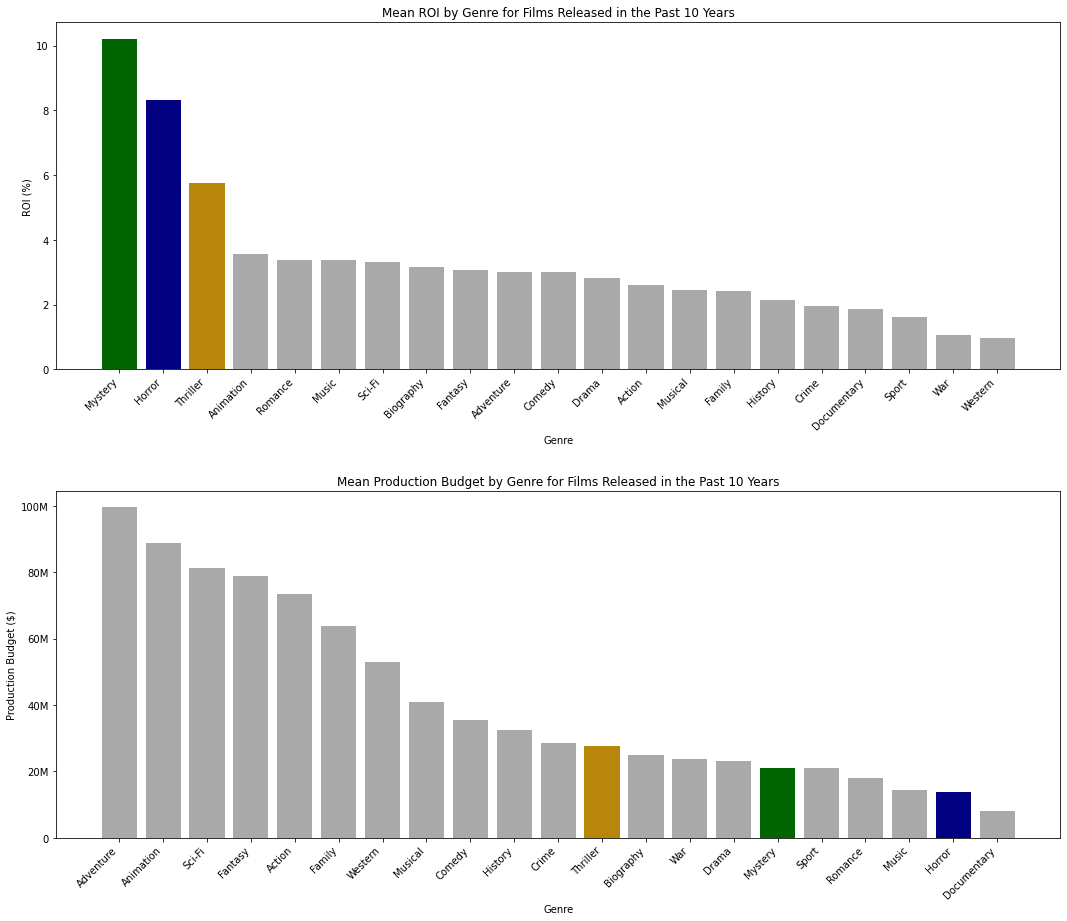

In [120]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,15))

colors_ax1 = ['darkgreen', 'navy', 'darkgoldenrod', 'darkgrey', 'darkgrey', 'darkgrey', 
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey']
ax1.bar(x=mean_ROI_by_g_df.index, height=mean_ROI_by_g_df['ROI'], color=colors_ax1)
ax1.set_xlabel('Genre')
ax1.set_ylabel('ROI (%)')
ax1.set_title('Mean ROI by Genre for Films Released in the Past 10 Years')

colors_ax2 = ['darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgrey', 'darkgoldenrod',
              'darkgrey', 'darkgrey', 'darkgrey', 'darkgreen', 'darkgrey', 'darkgrey',
              'darkgrey', 'navy', 'darkgrey']
ax2.bar(x=mean_prod_budget_by_g_df.index, height=mean_prod_budget_by_g_df['production_budget'],
        color=colors_ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Production Budget ($)')
ax2.set_title('Mean Production Budget by Genre for Films Released in the Past 10 Years')
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
y = np.array([0, 20000000, 40000000, 60000000, 80000000, 100000000])
y_ticks_labels = ["0", "20M", "40M", "60M", "80M", "100M"]
ax2.set_yticks(y)
ax2.set_yticklabels(y_ticks_labels)

plt.subplots_adjust(hspace=0.35)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right");
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha="right");

## Conclusion

I recommend that Microsoft's new film studio invest in producing mystery films, horrors, or thrillers. These three film genres have the highest ROI compared to the 18 other genres types. In addition, they tend to be lower budget films, which could be good for a brand new film studio that doesn't want to invest too many resources into a respectively uncharted marketplace.